In [1]:
# Librerias necesarias
from keras.utils import to_categorical
from keras.models import Sequential
from keras.utils import np_utils
from keras import layers
from keras import models
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
np.random.seed(20)
dt = pd.read_csv("TMNIST_Data.csv")
list_ = dt.values.tolist()

x = []
y  = []
train_data = []
train_label = []
test_data = []
test_label = []

In [3]:
dt.head()

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,GrandHotel-Regular,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,EncodeSansCondensed-Medium,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Varela-Regular,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ArefRuqaa-Bold,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,KulimPark-Regular,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# # Paso los valores de pixeles a arrays de 28x28 en X y cargo labels a Y
for i in range(len(list_)):
    label = list_[i][1]
    _ = list_[i][2:]
    _ = np.array(_)
    _ = _.reshape(28,28).tolist()
    x.append(_)
    y.append(label)
# Divido train data y test data
train_data, test_data, train_label, test_label = train_test_split(x, y, test_size=0.25, random_state=1)

In [5]:
print(len(train_data))
print(len(test_data))

22425
7475


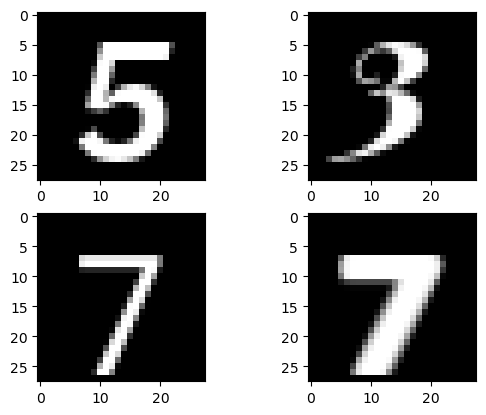

In [6]:
# Ejemplos
plt.subplot(221)
plt.imshow(train_data[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(train_data[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(test_data[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(test_data[3], cmap=plt.get_cmap('gray'))

plt.show()

In [7]:
# Transformo todo a arrays
train_data = np.array(train_data)
test_data = np.array(test_data)

train_label = np.array(train_label)
test_label = np.array(test_label)

In [8]:
# Convierto las listas en arrays para facilitar el postprocesado
train_data = train_data.reshape((22425, 28, 28, 1))
train_data = train_data.astype('float32') / 255

test_data = test_data.reshape((7475, 28, 28, 1))
test_data = test_data.astype('float32') / 255

# Conviero los vectores de labels a matrices binarias
train_label = to_categorical(train_label)
test_label = to_categorical(test_label)

In [9]:
# Creo el modelo
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [10]:
# Entreno
EPOCHS = 5
BATCHSIZE = 64

model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)
history = model.fit(train_data, train_label, epochs=EPOCHS, batch_size=BATCHSIZE)

Epoch 1/5
351/351 [==============================] - 7s 19ms/step - loss: 0.2366 - accuracy: 0.9274
Epoch 2/5
351/351 [==============================] - 6s 18ms/step - loss: 0.0571 - accuracy: 0.9842
Epoch 3/5
351/351 [==============================] - 6s 18ms/step - loss: 0.0365 - accuracy: 0.9893
Epoch 4/5
351/351 [==============================] - 7s 19ms/step - loss: 0.0267 - accuracy: 0.9923
Epoch 5/5
351/351 [==============================] - 7s 19ms/step - loss: 0.0202 - accuracy: 0.9937


In [11]:
test_loss, test_acc = model.evaluate(test_data, test_label)

234/234 [==============================] - 1s 4ms/step - loss: 0.0405 - accuracy: 0.9902


In [12]:
print("Resultados de accuracy del modelo: ", test_acc)

Resultados de accuracy del modelo:  0.9902341365814209


In [13]:
model.save("modelo.h5")